In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
print("Tensorflow version: {}".format(tf.__version__))
train = pd.read_csv("train.csv")
train.head()

Tensorflow version: 1.14.0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


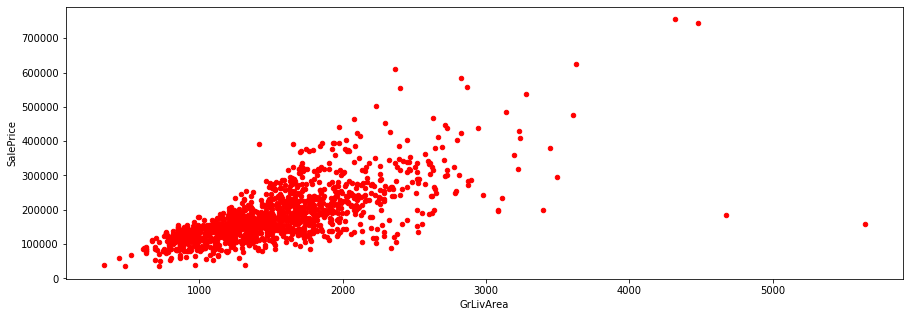

In [51]:
train.plot(kind='scatter', x= 'GrLivArea',y ='SalePrice', color='red', figsize=(15,5))

In [42]:
train_df=train
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df['GrLivArea'] = scaler.fit_transform(train_df['GrLivArea'].values.reshape(-1, 1))
train_df['SalePrice'] = scaler.fit_transform(train_df['SalePrice'].values.reshape(-1, 1))

In [43]:
train_df['GrLivArea'].head()

0    0.259231
1    0.174830
2    0.273549
3    0.260550
4    0.351168
Name: GrLivArea, dtype: float64

In [44]:
# Declaring Variables
m = tf.Variable(0.0)
batch_size=300
b = tf.Variable(0.0)# Declaring placeholders to place the training data
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])# Linear Regression Equation
y_model = m*xph + b
error = tf.reduce_sum(tf.square(yph-y_model))# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [46]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    epochs = 1000
    for i in range(epochs):
        rand_ind = np.random.randint(len(train_df),size=batch_size)
        feed = {xph:train_df['GrLivArea'][rand_ind].values, 
                yph:train_df['SalePrice'][rand_ind].values}
        sess.run(train,feed_dict=feed)
    model_m, model_b = sess.run([m,b])

In [47]:
print("The trained weight for m is : {m}".format(m=model_m))
print("The trained weight for b is : {b}".format(b=model_b))

The trained weight for m is : 0.8064028024673462
The trained weight for b is : 0.02886560931801796


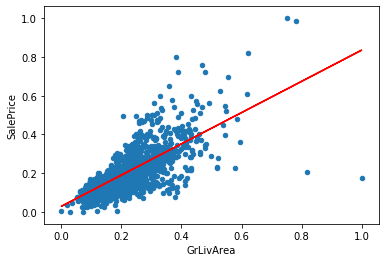

In [52]:
y_hat = train_df['GrLivArea'] * model_m + model_b
train_df.plot(kind='scatter',x='GrLivArea',y='SalePrice')
plt.plot(train_df['GrLivArea'],y_hat,'r')

In [53]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(train_df['SalePrice'], y_hat) ** 0.5
print("Root Mean Sqaured Error:",rmse )

Root Mean Sqaured Error: 0.07803176962457681
